In [3]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# LightGBM
import lightgbm as lgb
from sklearn.model_selection import KFold

# DecisionTree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
sns.set()

## Rendelés 100

A tábla tartalmazza a megrendeléseket
- Mezők jelentése:
    - id: rendelés azonosító
    - api_azon: rendelés azonosító nagykerben
    - **api_hiba_kod**: nagykerben automata leadásnál kapott hiba
    - api_hiba_text: nagykerben automata leadásnál kapott hiba szövegesen
    - sku: termék azonosító
    - **netto_ar**: BHP eladási nettó ár
    - **menny**: rendelt mennyiség
    - **ossz**: vásárló által fizetendő nettó összeg
    - **shipto**: szállítási mód
    - **billto**: fizetési mód
    - **kezbesit**: kézbesítés időpontja
    - **bt_irsz**: számlázási cím irányítószáma
    - **bt_city**: számlázási cím városa
    - bt_address: számlázás cím
    - bt_tel: számlázás telefonszám
    - **bt_ceg**: számlázás cég név
    - bt_cegado: számlázás adószám
    - st_same_bt: számlázási cím ugyan az mint a szállítási
    - st_irsz: szállítási irányítószám
    - st_city: szállítási város
    - st_address: szállítási cím
    - st_tel: szállítási telefonszám
    - from_message: vásárló megjegyzése
    - send_message: eladó megjegyzése
    - **erkezett**: rendelés érkezési időpont
    - **shop**: webáruház ahol a rendelést leadták
    - **order_in**: rendelés beérkezésének módja
    - **prod_name**: termék neve
    - **fizetendo**: rendelés leadásakor a termék beszerzési ára
    - **szallitas**: szállítási költség
    - **fizetendo_feed**: beszerzési ár automata leadáskor válaszként kapott (netto)
    - **nagyker**: mely nagyker terméke

A prod_name mező a megrendelt termék neve + tulajdonságai stringben? Nincs összegkötve a termek táblával?
- a prod name a termék neve, nincs plus, a nevében vannak tulajdonságok is
- a termék táblával való összekötést a nagyker és sku mező együtt adja 

In [ ]:
df_rendeles = pd.read_csv('input/rendeles_100.csv', sep=';', index_col=0)

In [ ]:
df_rendeles[:5]

In [ ]:
df_rendeles.columns

### api_hiba_kod

In [ ]:
df_rendeles[df_rendeles['api_hiba_kod '].isna()].sum().sum()

### netto_ar

In [ ]:
df_rendeles.sort_values(by='netto_ar ', ascending=True, inplace=True)

In [ ]:
q1_na = int(df_rendeles['netto_ar '].count()/4)
q3_na = int(3*df_rendeles['netto_ar '].count()/4)

print('Range of netto_ar: {:,.2f} - {:,.2f}'.format(df_rendeles['netto_ar '].min(), df_rendeles['netto_ar '].max()))
print('Interquartile range of netto_ar: {:,.2f} - {:,.2f}'.format(df_rendeles['netto_ar '].iloc[q1_na], df_rendeles['netto_ar '].iloc[q3_na]))

In [ ]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.distplot(df_rendeles['netto_ar '].values, bins=100, norm_hist=True)

ax = plt.gca()
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

plt.title('netto_ar hisztogram')
plt.xlabel('netto_ar')
plt.xticks(np.arange(min(df_rendeles['netto_ar ']), max(df_rendeles['netto_ar '])+1, 2500.0), rotation=45)
plt.ylabel('Mennyiség')
plt.axvline(df_rendeles['netto_ar '].iloc[q1_na], color="k", linestyle="--", linewidth=1)
plt.axvline(df_rendeles['netto_ar '].iloc[q3_na], color="k", linestyle="--", linewidth=1)
plt.show()

### menny

In [ ]:
df_rendeles['menny '].describe()

### ossz

In [ ]:
df_rendeles.sort_values(by='ossz ', ascending=True, inplace=True)

In [ ]:
q1_os = int(df_rendeles['ossz '].count()/4)
q3_os = int(3*df_rendeles['ossz '].count()/4)

print('Range of ossz: {:,.2f} - {:,.2f}'.format(df_rendeles['ossz '].min(), df_rendeles['ossz '].max()))
print('Interquartile range of ossz: {:,.2f} - {:,.2f}'.format(df_rendeles['ossz '].iloc[q1_os], df_rendeles['ossz '].iloc[q3_os]))

In [ ]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.distplot(df_rendeles['ossz '].values, bins=100, norm_hist=True)

ax = plt.gca()
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

plt.title('ossz hisztogram')
plt.xlabel('ossz')
plt.xticks(np.arange(min(df_rendeles['ossz ']), max(df_rendeles['ossz '])+1, 10000.0), rotation=45)
plt.ylabel('Összeg')
plt.axvline(df_rendeles['netto_ar '].iloc[q1_os], color="k", linestyle="--", linewidth=1)
plt.axvline(df_rendeles['netto_ar '].iloc[q3_os], color="k", linestyle="--", linewidth=1)
plt.show()

### shipto

In [ ]:
df_rendeles['shipto '].value_counts()

### billto

In [ ]:
df_rendeles['billto '].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(15, 4)})
df_rendeles['billto '].value_counts().plot(kind='bar')

plt.title('billto hisztogram')
plt.xlabel('billto')
plt.xticks(rotation=45)
plt.ylabel('Darab')
plt.show()

### kezbesit

In [ ]:
df_rendeles.sort_values(by='kezbesit ', ascending=True, inplace=True)

In [ ]:
q1_ke = int(df_rendeles['kezbesit '].count()/4)
q3_ke = int(3*df_rendeles['kezbesit '].count()/4)

print('Range of kezbesit: {:} - {:}'.format(df_rendeles['kezbesit '].iloc[0], df_rendeles['kezbesit '].iloc[df_rendeles['kezbesit '].count()]))
print('Interquartile range of kezbesit: {:} - {:}'.format(df_rendeles['kezbesit '].iloc[q1_ke], df_rendeles['kezbesit '].iloc[q3_ke]))

In [ ]:
sns.set(rc={'figure.figsize':(15, 4)})
df_rendeles['kezbesit '].value_counts().plot(kind='bar')

plt.title('kezbesit hisztogram')
plt.xlabel('kezbesit')
plt.xticks(rotation=45)
plt.ylabel('Darab')
plt.show()

### bt_irsz

In [ ]:
sns.set(rc={'figure.figsize':(15, 4)})
df_irsz = df_rendeles['bt_irsz '].value_counts().to_frame()

df_irsz[df_irsz['bt_irsz '] > 1].plot(kind='bar')

plt.title('bt_irsz hisztogram')
plt.xlabel('bt_irsz')
plt.xticks(rotation=45)
plt.ylabel('Darab')
plt.show()

### bt_city

In [ ]:
sns.set(rc={'figure.figsize':(15, 4)})
df_irsz = df_rendeles['bt_city '].value_counts().to_frame()

df_irsz[df_irsz['bt_city '] > 1].plot(kind='bar')

plt.title('bt_city hisztogram')
plt.xlabel('bt_city')
plt.xticks(rotation=45)
plt.ylabel('Darab')
plt.show()

### bt_ceg

In [ ]:
df_rendeles['bt_ceg '].value_counts()

### shop

In [ ]:
df_rendeles['shop '].value_counts()

### szallitas

In [ ]:
df_rendeles['szallitas '].value_counts()

In [ ]:
df_rendeles.sort_values(by='szallitas ', ascending=True, inplace=True)

In [ ]:
q1_sz = int(df_rendeles['szallitas '].count()/4)
q3_sz = int(3*df_rendeles['szallitas '].count()/4)

print('Range of szallitas: {:,.2f} - {:,.2f}'.format(df_rendeles['szallitas '].min(), df_rendeles['szallitas '].max()))
print('Interquartile range of szallitas: {:,.2f} - {:,.2f}'.format(df_rendeles['szallitas '].iloc[q1_sz], df_rendeles['szallitas '].iloc[q3_sz]))

### nagyker

In [ ]:
df_rendeles['nagyker '].value_counts()

## Rendelések

In [5]:
shops_list = ['akh', 'archive', 'gumiflex', 'ihle', 'marso', 'olahgumi', 'vandenban']

df_orders = pd.DataFrame(columns=['webshop', 'api_azon', 'api_hiba_kod', 'api_hiba_text', 'sku', 'netto_ar', 'menny',
       'ossz', 'shipto', 'billto', 'kezbesit', 'bt_irsz', 'bt_city',
       'erkezett', 'mod', 'status', 'shop', 'order_in', 'prod_name', 'up_user',
       'mod_user', 'fizetendo', 'szallitas', 'fizetendo_feed', 'nagyker',
       'athelyezve', 'aff_id', 'arukereso', 'tyretest', 'sendmail',
       'kerszamla', 'csavarszett', 'csavar_netto_ar', 'zarol_user',
       'zarol_ido'])

In [6]:
for i in shops_list:
    df_order = pd.read_csv('input/bhpadmin_{:}_hu_orders.csv'.format(i), sep=';', dtype=
        {
            'webshop': 'object',
            'api_azon': 'object',
            'api_hiba_kod': 'int',
            'api_hiba_text': 'object',
            'sku': 'object',
            'netto_ar': 'object',
            'menny': 'object',
            'ossz': 'object',
            'shipto': 'category',
            'billto': 'category',
            'kezbesit': 'object',
            'bt_irsz': 'int',
            'bt_city': 'object',
            'erkezett': 'object',
            'mod': 'object',
            'status': 'object',
            'shop': 'object',
            'order_in': 'category',
            'prod_name': 'object',
            'up_user': 'object',
            'mod_user': 'object',
            'fizetendo': 'object',
            'szallitas': 'float64',
            'fizetendo_feed': 'object',
            'nagyker': 'object',
            'athelyezve': 'object',
            'aff_id': 'object',
            'arukereso': 'object',
            'tyretest': 'object',
            'sendmail': 'object',
            'kerszamla': 'object',
            'csavarszett': 'object',
            'csavar_netto_ar': 'object',
            'zarol_user': 'object',
            'zarol_ido': 'object'
        }
    )
    df_order['webshop'] = i

    print('Reading `{}` containing {:,} records and {:} features.'.format(i, df_order.shape[0], df_order.shape[1]))
    df_orders = df_orders.append(df_order, ignore_index=True, sort=True)

Reading `akh` containing 8,637 records and 36 features.


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading `archive` containing 50,145 records and 36 features.
Reading `gumiflex` containing 2,990 records and 36 features.
Reading `ihle` containing 561 records and 36 features.
Reading `marso` containing 4,084 records and 36 features.
Reading `olahgumi` containing 412 records and 36 features.
Reading `vandenban` containing 259 records and 36 features.


In [7]:
df_orders.shape

(67088, 70)

In [8]:
df_orders[:5]

,aff_id,aff_id,api_azon,api_azon,api_hiba_kod,api_hiba_kod,api_hiba_text,api_hiba_text,arukereso,arukereso,...,szallitas,szallitas,tyretest,tyretest,up_user,up_user,webshop,zarol_ido,zarol_user,zarol_user
0,0,NaN,IR17-166188,NaN,0,NaN,NaN,NaN,1,NaN,...,1158.0,NaN,2018.01.02,NaN,auto,NaN,akh,NaN,NaN,NaN
1,0,NaN,IR17-166189,NaN,0,NaN,NaN,NaN,1,NaN,...,2316.0,NaN,2018.01.04,NaN,auto,NaN,akh,NaN,NaN,NaN
2,0,NaN,IR17-166202,NaN,0,NaN,NaN,NaN,0,NaN,...,2316.0,NaN,2018.01.04,NaN,tothdavid960521@gmail.com,NaN,akh,NaN,NaN,NaN
3,0,NaN,IR17-166215,NaN,0,NaN,NaN,NaN,1,NaN,...,1158.0,NaN,2018.01.09,NaN,auto,NaN,akh,NaN,NaN,NaN
4,0,NaN,IR17-166257,NaN,0,NaN,NaN,NaN,1,NaN,...,1158.0,NaN,2018.01.09,NaN,auto,NaN,akh,NaN,NaN,NaN


In [ ]:
df_orders['ossz'].unique()

In [ ]:
df_orders['ossz'][df_orders['webshop'] == 'akh'][:5]

In [9]:
def draw_histogram(df_values, title, q1, q3):
    sns.set(rc={'figure.figsize':(15, 6)})
    sns.distplot(df_values.values, bins=100, norm_hist=False)

    plt.title('`{}` hisztogram'.format(title))
    plt.xlabel(title)
    plt.ylabel('Gyakoriság')
    plt.axvline(df_values.iloc[q1], color="k", linestyle="--", linewidth=1)
    plt.axvline(df_values.iloc[q3], color="k", linestyle="--", linewidth=1)
    plt.show()

Mennyiség (menny)

Terjedelem: 0.00 - 48.00
Interkvartilis tartomány: 2.00 - 4.00


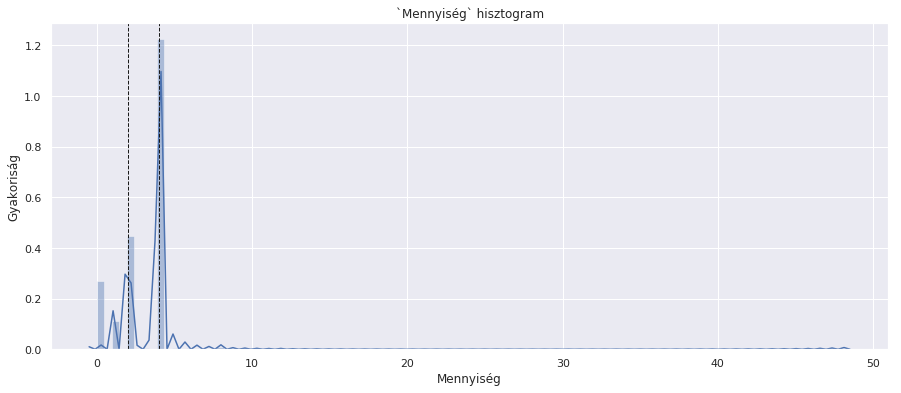

Nettó ár (netto_ar)

Terjedelem: 0.00 - 10,380,550.00
Terjedelem (utolsó 10% nélkül): 0.00 - 23,342.00
Interkvartilis tartomány (utolsó 10% nélkül): 8,138.00 - 13,605.00


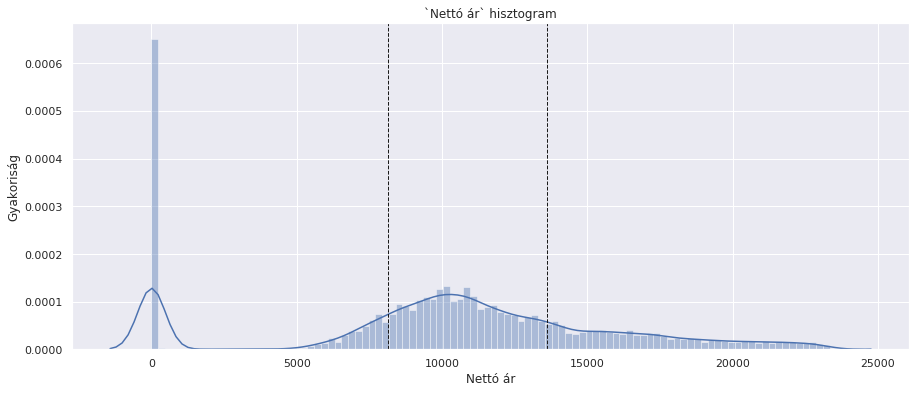

Összesen (ossz)

Terjedelem: 0.00 - 83,044,402.00
Terjedelem (utolsó 10% nélkül): 0.00 - 82,415.00
Interkvartilis tartomány (utolsó 10% nélkül): 18,785.00 - 47,510.00


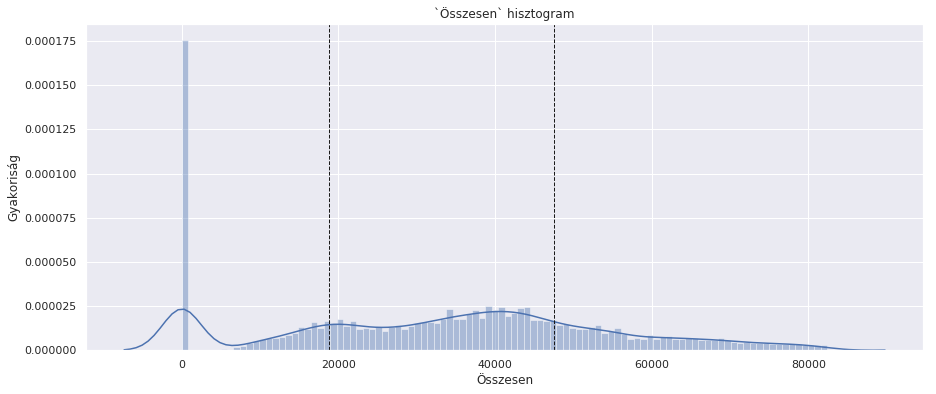

Fizetendő (fizetendo)

Terjedelem: -26,351.00 - 80,000,000.00
Terjedelem (utolsó 10% nélkül): -26,351.00 - 67,160.00
Interkvartilis tartomány (utolsó 10% nélkül): 0.00 - 39,160.00


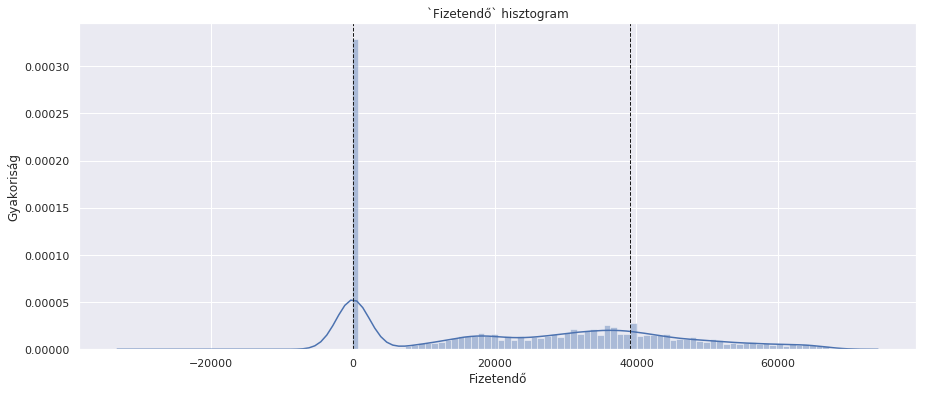

Szállítási díj (szallitas)

Terjedelem: 0.00 - 67,560.00
Terjedelem (utolsó 10% nélkül): 0.00 - 2,516.00
Interkvartilis tartomány (utolsó 10% nélkül): 0.00 - 1,560.00


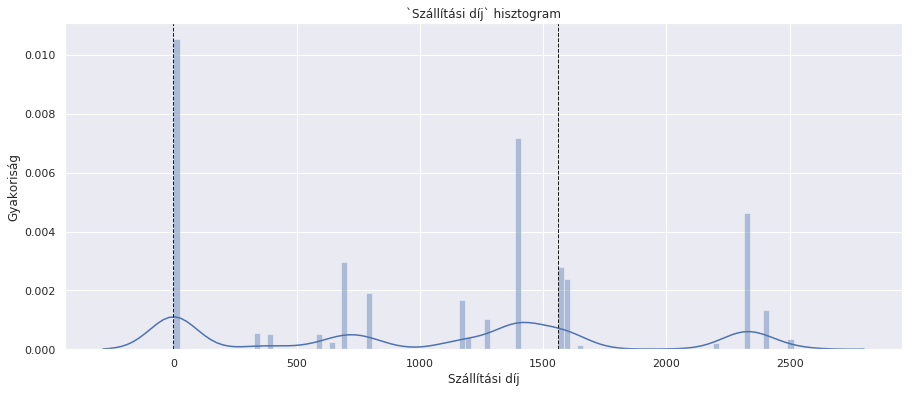

In [10]:
col2hist_dict = [
    {'id': 'menny', 'title': 'Mennyiség', 'type': 'numeric', 'remove_last_10_percent': False},
    {'id': 'netto_ar', 'title': 'Nettó ár', 'type': 'numeric', 'remove_last_10_percent': True},
    {'id': 'ossz', 'title': 'Összesen', 'type': 'numeric', 'remove_last_10_percent': True},
    {'id': 'fizetendo', 'title': 'Fizetendő', 'type': 'numeric', 'remove_last_10_percent': True},
    {'id': 'szallitas', 'title': 'Szállítási díj', 'type': 'numeric', 'remove_last_10_percent': True}
]

for i in col2hist_dict:
    print("\033[4m{} ({})\033[0m\n".format(i['title'], i['id']))

    if i['type'] == 'numeric':
        df_orders[i['id']] = pd.to_numeric(df_orders[i['id']], errors='coerce').fillna(0).astype(np.int64)
    
    df_orders.sort_values(by=i['id'], ascending=True, inplace=True)

    if i['remove_last_10_percent']:
        df_clipped = df_orders[:-int(df_orders[i['id']].count()/10)].copy()
    else:
        df_clipped = df_orders.copy()

    q1 = int(df_clipped[i['id']].count()/4)
    q3 = int(3*df_clipped[i['id']].count()/4)

    print('Terjedelem: {:,.2f} - {:,.2f}'.format(df_orders[i['id']].min(), df_orders[i['id']].max()))
    if i['remove_last_10_percent']:
        print('Terjedelem (utolsó 10% nélkül): {:,.2f} - {:,.2f}'.format(df_clipped[i['id']].min(), df_clipped[i['id']].max()))
    
    if i['remove_last_10_percent']:
        print('Interkvartilis tartomány (utolsó 10% nélkül): {:,.2f} - {:,.2f}'.format(df_clipped[i['id']].iloc[q1], df_clipped[i['id']].iloc[q3]))
    else:
        print('Interkvartilis tartomány: {:,.2f} - {:,.2f}'.format(df_clipped[i['id']].iloc[q1], df_clipped[i['id']].iloc[q3]))

    draw_histogram(df_clipped[i['id']], i['title'], q1, q3)

## Classification

In [11]:
target = df_orders['prod_name'].copy()
target = pd.get_dummies(target, prefix=['prod'])

In [12]:
df_train_columns = ['netto_ar', 'menny', 'bt_irsz', 'order_in']
df_train = df_orders[df_train_columns].copy()

In [13]:
df_train = pd.get_dummies(df_train, columns = ['bt_irsz', 'order_in'])

### DecisionTree

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### LightGBM

In [ ]:
df_train.reset_index(inplace=True, drop=True)
df_train[:5]

In [ ]:
%%time
param = {
    "bagging_freq": 1,
    "bagging_fraction": 0.9,
    "bagging_seed": 11,
    "boosting": "gbdt",

    "feature_fraction": 0.9,
    #"feature_fraction_seed": 1,

    "lambda_l1": 0.1,
    "learning_rate": 0.01,

    #"max_bin": 5,
    'max_depth': -1,
    "metric": "rmse",
    #"min_data_in_leaf": 30,
    #"min_gain_to_split": 0.1,
    "min_child_samples": 20,
    #"num_boost_round": 100,
    "num_leaves": 31,
    "nthread": -1,

    "objective": "multiclass",

    "random_state": 402,
    "verbosity": -1
}

folds = KFold(n_splits=5, shuffle=True, random_state=402)
oof_lgbm = np.zeros(len(df_train))
#predictions_lgbm = np.zeros(len(df_test))
feature_importance_lgbm = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train)):
    print("\nFold {}.".format(fold_+1))
    trn_data = lgb.Dataset(df_train.iloc[trn_idx], label=target.iloc[trn_idx])
    #val_data = lgb.Dataset(df_train.iloc[val_idx], label=target.iloc[val_idx])

    #model_lgbm = lgb.train(param, trn_data, 10000, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds=100)
    #oof_lgbm[val_idx] = model_lgbm.predict(df_train.iloc[val_idx][df_train_columns], num_iteration=model_lgbm.best_iteration)
    
    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = df_train_columns
    #fold_importance_df["importance"] = model_lgbm.feature_importance()
    #fold_importance_df["fold"] = fold_ + 1
    #feature_importance_lgbm = pd.concat([feature_importance_lgbm, fold_importance_df], axis=0)
    
    #predictions_lgbm += model_lgbm.predict(df_test[df_train_columns], num_iteration=model_lgbm.best_iteration) / folds.n_splits